### K-Mean
- 군집 중심점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

##### 과정
1) centroid를 구성하려는 군집화 개수 만큼 임의의 위치에 배치함
2) 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨
3) centroid를 소속된 데이터의 평균 중심으로 이동시킴
4) 각 데이터는 기존의 centroid보다 더 가까운 centroid가 있다면 해당 중심점으로 다시 소속을 변경함
5) centroid를 다시 소속된 데이터의 평균 중심으로 이동시킴
6) 더이상 데이터의 소속 변경이 없으면 군집화를 종료함. 그렇지 않다면 다시 4번 과정을 거치고 반복함

##### 장점
- 일반적인 군집화에서 가장 많이 사용됨
- 알고리즘이 쉽고 간결함

##### 단점
- feature가 많을수록 정확도가 떨어짐. 이 경우 PCA를 적용해야 할 수 있음
- 반복 횟수가 많을수록 수행시간이 길어짐
- 몇개의 군집을 선택할지 가이드하기 어려움

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
# 다음은 중요한 파라마티를 설정한 KMeans임
kmeans = KMeans(n_clusters=3, # centroid의 갯수를 뜻함
                init='k-means++', # centroid의 좌표를 설정할 방식을 말함
                max_iter=300, # 최대 반복 횟수임
                random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [13]:
kmeans.cluster_centers_

array([[ 5.00600000e+00,  3.42800000e+00,  1.46200000e+00,
         2.46000000e-01,  0.00000000e+00,  1.00000000e+00,
        -2.64241546e+00,  1.90885047e-01],
       [ 5.90161290e+00,  2.74838710e+00,  4.39354839e+00,
         1.43387097e+00,  1.22580645e+00, -1.22124533e-15,
         6.75662290e-01, -3.15204772e-01],
       [ 6.85000000e+00,  3.07368421e+00,  5.74210526e+00,
         2.07105263e+00,  1.94736842e+00,  2.00000000e+00,
         2.37446608e+00,  2.63116935e-01]])

In [4]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


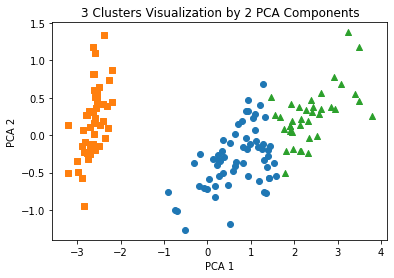

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성 

- make_blobs(): 개별 군집의 centroid와 표준 편차 제어 기능이 추가돼있음
- make_classification(): 노이즈를 포함한 데이터를 만드는데 유용함
- make_circle(), make_moon() API는 centroid 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용됨

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, # 생성할 총 데이터의 개수, default = 100
                  n_features=2, # 데이터의 feature의 수. 시각화를 목표로 할 경우 2개로 설정하고, feature를 x, y로 표현
                  centers=3, # 군집의 개수를 나타냄. ndarray 형태로 표현할 경우 개별 군집 centroid의 좌표를 의미함
                  cluster_std=0.8, # 생성된 군집 데이터의 표준편차를 의미함. 리스트의 형태일 경우 해당 인덱스에 해당되는 군집의 표준편차를 뜻함
                  random_state=0) 
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


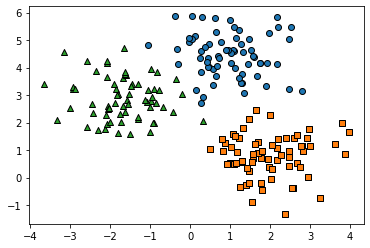

In [9]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

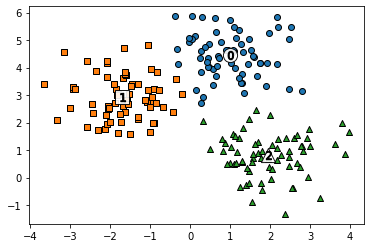

In [10]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()


In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64
